In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [6]:
import requests
requests.__version__

'2.22.0'

In [7]:
# Import the requests library.
import requests
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11def79fe227e1ddceb0f892565d0af1


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11def79fe227e1ddceb0f892565d0af1&q=boston


In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02n"}],"base":"stations","main":{"temp":72.88,"feels_like":72.82,"temp_min":69.8,"temp_max":75.99,"pressure":1007,"humidity":83},"visibility":16093,"wind":{"speed":11.41,"deg":180},"clouds":{"all":20},"dt":1592966044,"sys":{"type":1,"id":3486,"country":"US","sunrise":1592903286,"sunset":1592958295},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [12]:
# Get the JSON text of the 'Get' request.
city_weather.json()


{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 72.88,
  'feels_like': 72.82,
  'temp_min': 69.8,
  'temp_max': 75.99,
  'pressure': 1007,
  'humidity': 83},
 'visibility': 16093,
 'wind': {'speed': 11.41, 'deg': 180},
 'clouds': {'all': 20},
 'dt': 1592966044,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1592903286,
  'sunset': 1592958295},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 72.88,
  'feels_like': 72.82,
  'temp_min': 69.8,
  'temp_max': 75.99,
  'pressure': 1007,
  'humidity': 83},
 'visibility': 16093,
 'wind': {'speed': 11.41, 'deg': 180},
 'clouds': {'all': 20},
 'dt': 1592966044,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1592903286,
  'sunset': 1592958295},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Get the JSON data.
boston_data = city_weather.json()

In [16]:
boston_data['sys']

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1592903286,
 'sunset': 1592958295}

In [17]:
boston_data['sys']['country']

'US'

In [18]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 75.99 83 20 11.41


In [19]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')


'2020-06-24 02:34:04'

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [21]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"


In [22]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | tasiilaq
Processing Record 2 of Set 13 | ushuaia
Processing Record 3 of Set 13 | chokurdakh
Processing Record 4 of Set 13 | rikitea
Processing Record 5 of Set 13 | bluff
Processing Record 6 of Set 13 | talnakh
Processing Record 7 of Set 13 | dahanu
Processing Record 8 of Set 13 | san quintin
Processing Record 9 of Set 13 | henties bay
Processing Record 10 of Set 13 | cape town
Processing Record 11 of Set 13 | coquimbo
Processing Record 12 of Set 13 | punta arenas
Processing Record 13 of Set 13 | barbar
City not found. Skipping...
Processing Record 14 of Set 13 | bredasdorp
Processing Record 15 of Set 13 | busselton
Processing Record 16 of Set 13 | bukoba
Processing Record 17 of Set 13 | itirucu
Processing Record 18 of Set 13 | sitka
Processing Record 19 of Set 13 | upernavik
Processing Record 20 of Set 13 | kuche
City not found. Skipping...
Processing Record 21 of Set 13 | evensk
Processing Record 22 of Set 13 | albany
Processing Record 23 of Set 13 | ne

Processing Record 38 of Set 16 | souillac
Processing Record 39 of Set 16 | tura
Processing Record 40 of Set 16 | nisia floresta
Processing Record 41 of Set 16 | east london
Processing Record 42 of Set 16 | fare
Processing Record 43 of Set 16 | jiuquan
Processing Record 44 of Set 16 | altay
Processing Record 45 of Set 16 | sola
Processing Record 46 of Set 16 | kapoeta
Processing Record 47 of Set 16 | ribeira grande
Processing Record 48 of Set 16 | beloha
Processing Record 49 of Set 16 | tommot
Processing Record 50 of Set 16 | nguruka
Processing Record 1 of Set 17 | ukiah
Processing Record 2 of Set 17 | arrifes
Processing Record 3 of Set 17 | shasta lake
Processing Record 4 of Set 17 | provideniya
Processing Record 5 of Set 17 | raudeberg
Processing Record 6 of Set 17 | korablino
Processing Record 7 of Set 17 | kinkala
Processing Record 8 of Set 17 | husavik
Processing Record 9 of Set 17 | itarema
Processing Record 10 of Set 17 | berlevag
Processing Record 11 of Set 17 | leningradskiy
Pr

Processing Record 24 of Set 20 | sibolga
Processing Record 25 of Set 20 | krasnyy chikoy
Processing Record 26 of Set 20 | germersheim
Processing Record 27 of Set 20 | vikulovo
Processing Record 28 of Set 20 | douglas
Processing Record 29 of Set 20 | cayenne
Processing Record 30 of Set 20 | tapes
Processing Record 31 of Set 20 | esperance
Processing Record 32 of Set 20 | mys shmidta
City not found. Skipping...
Processing Record 33 of Set 20 | taoudenni
Processing Record 34 of Set 20 | touros
Processing Record 35 of Set 20 | koraput
Processing Record 36 of Set 20 | verkhoturye
Processing Record 37 of Set 20 | sivas
Processing Record 38 of Set 20 | poltava
Processing Record 39 of Set 20 | kendal
Processing Record 40 of Set 20 | arti
Processing Record 41 of Set 20 | yuancheng
Processing Record 42 of Set 20 | vung tau
Processing Record 43 of Set 20 | finschhafen
Processing Record 44 of Set 20 | doha
Processing Record 45 of Set 20 | la baule-escoublac
Processing Record 46 of Set 20 | jever
P

Processing Record 8 of Set 24 | araxa
Processing Record 9 of Set 24 | witu
Processing Record 10 of Set 24 | oistins
Processing Record 11 of Set 24 | preobrazheniye
Processing Record 12 of Set 24 | mildura
Processing Record 13 of Set 24 | uwayl
City not found. Skipping...
Processing Record 14 of Set 24 | farrukhnagar
Processing Record 15 of Set 24 | mocambique
City not found. Skipping...
Processing Record 16 of Set 24 | doembang nangbuat
Processing Record 17 of Set 24 | palmer
Processing Record 18 of Set 24 | vada
Processing Record 19 of Set 24 | shihezi
Processing Record 20 of Set 24 | mogadishu
Processing Record 21 of Set 24 | floro
Processing Record 22 of Set 24 | port-cartier
Processing Record 23 of Set 24 | charters towers
Processing Record 24 of Set 24 | phonhong
Processing Record 25 of Set 24 | patnos
Processing Record 26 of Set 24 | santona
Processing Record 27 of Set 24 | denpasar
Processing Record 28 of Set 24 | upata
Processing Record 29 of Set 24 | asau
Processing Record 30 

In [23]:
len(city_data)

571

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.61,-37.64,42.80,81,100,1.21,GL,2020-06-24 02:34:33
1,Ushuaia,-54.80,-68.30,33.80,86,90,18.34,AR,2020-06-24 02:34:20
2,Chokurdakh,70.63,147.92,76.69,26,49,8.08,RU,2020-06-24 02:36:51
3,Rikitea,-23.12,-134.97,69.94,53,84,9.53,PF,2020-06-24 02:36:51
4,Bluff,-46.60,168.33,48.54,84,93,14.18,NZ,2020-06-24 02:36:51
5,Talnakh,69.49,88.40,62.60,55,100,6.71,RU,2020-06-24 02:35:38
6,Dahanu,19.97,72.73,84.54,77,40,14.16,IN,2020-06-24 02:36:51
7,San Quintin,30.48,-115.95,64.54,85,97,14.20,MX,2020-06-24 02:36:52
8,Henties Bay,-22.12,14.28,60.01,75,0,16.96,NA,2020-06-24 02:36:52
9,Cape Town,-33.93,18.42,51.01,100,0,8.05,ZA,2020-06-24 02:34:08


In [26]:
new_columns = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_columns

['City',
 'Country',
 'Date',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed']

In [27]:
city_data_df = city_data_df[new_columns]

In [28]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2020-06-24 02:34:33,65.61,-37.64,42.80,81,100,1.21
1,Ushuaia,AR,2020-06-24 02:34:20,-54.80,-68.30,33.80,86,90,18.34
2,Chokurdakh,RU,2020-06-24 02:36:51,70.63,147.92,76.69,26,49,8.08
3,Rikitea,PF,2020-06-24 02:36:51,-23.12,-134.97,69.94,53,84,9.53
4,Bluff,NZ,2020-06-24 02:36:51,-46.60,168.33,48.54,84,93,14.18
...,...,...,...,...,...,...,...,...,...
566,Geraldton,AU,2020-06-24 02:35:36,-28.77,114.60,64.40,77,75,3.36
567,Roebourne,AU,2020-06-24 02:37:38,-20.78,117.13,80.31,27,0,10.25
568,Gamba,GA,2020-06-24 02:37:39,-2.65,10.00,71.15,91,75,4.25
569,Palembang,ID,2020-06-24 02:37:39,-2.92,104.75,81.27,82,100,4.47


# Stem Exercise


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [37]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today


'06/23/20'

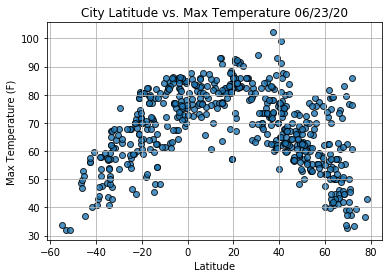

In [38]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()